## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [222]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)
original_data.dropna(inplace=True)
original_data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [223]:
def split_train_test(df, train_ratio = 0.8, type = 'random', time_col = None):
    if type == 'chronologically':
        df.sort_values(inplace= True, by=time_col)
    elif type == 'random':
        df = df.sample(frac=1,random_state=0)
    else:
        raise ValueError("type can be either 'random' or 'chronologically'")
        
    n = len(df)
    split = int(n*train_ratio)
    df_train = df.iloc[:split]
    df_test = df.iloc[split:]
    return df_train, df_test

df_train, df_test = split_train_test(original_data)

features = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)']
X_train, X_test = df_train[features], df_test[features]
y_train, y_test = df_train['outcome_type'], df_test['outcome_type']

# standardized
categorical = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake','sex_upon_outcome']
X_train, X_test = pd.get_dummies(X_train[categorical]),  pd.get_dummies(X_test[categorical])
X_train_stand, X_test_stand = (X_train-X_train.mean())/ X_train.std(), (X_test-X_test.mean())/ X_test.std()

# get dummies also for label --> we are interested only in adopted 1 or 0 
y_train, y_test = pd.get_dummies(y_train), pd.get_dummies(y_test)
y_train, y_test = y_train['Adoption'], y_test['Adoption']

# Test
print(f"Lenght of df: {len(original_data)}")
print(f"Expected lenght of X_train df: {int(len(original_data)*0.8)}")
print(f"Expected lenght of X_test df: {int(len(original_data)*0.2)}")
print('--- Check ---')
print(f"Actual lenght of X_train df: {len(X_train_stand)}")
print(f"Actual lenght of X_test df: {len(X_test_stand)}")

#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(X, train_size= 0.8, test_size=0.2)
#y_train, y_test = train_test_split(y, train_size= 0.8, test_size=0.2)


Lenght of df: 79661
Expected lenght of X_train df: 63728
Expected lenght of X_test df: 15932
--- Check ---
Actual lenght of X_train df: 63728
Actual lenght of X_test df: 15933


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

(15933,)
(15933,)


Text(0.5, 1.0, 'Confusion Matrix')

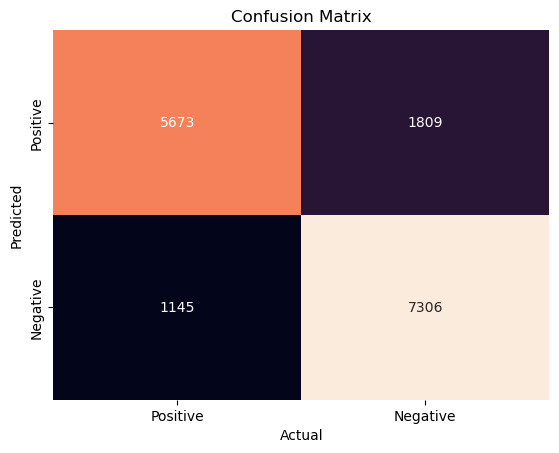

In [224]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_stand,y_train)
lr_proba = lr.predict_proba(X_test_stand)

t = 0.5

def compute_confusion_matrix(y_true, predict_proba, t=0.5):
    y_predict = (predict_proba > t).astype(int)

    TP = np.sum(np.logical_and(y_true ==1, y_predict==1))
    FP = np.sum(np.logical_and(y_true ==0, y_predict ==1))
    FN = np.sum(np.logical_and(y_true ==1, y_predict ==0))
    TN = np.sum(np.logical_and(y_true ==0, y_predict ==0))
    cm = pd.DataFrame(([TP, FP], [FN, TN]), index=['Positive', 'Negative'], columns=['Positive', 'Negative'])

    return cm

# matching the dimentions
print(y_test.shape)
lr_proba = lr_proba[:,1]
print(lr_proba.shape)

confusion_matrix = compute_confusion_matrix(y_test, lr_proba,t)
sn.heatmap(confusion_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [228]:
def compute_scores(confusion_matrix):
    confusion_matrix = confusion_matrix.to_numpy()
    TP, FP = confusion_matrix[0]
    FN, TN = confusion_matrix[1]
    accuracy = (TP + TN) / (TP+FP+FN+TN)

    precision_pos = TP/(TP+FP)
    precision_neg= TN/(TN+FN)

    recall_pos = TP/(TP+FN)
    recall_neg = TN/(TN+FP)

    f1_score = 2 * (precision_pos*recall_pos) / (precision_pos+recall_pos)
    f2_score = 2 * (precision_neg*recall_neg) / (precision_neg+recall_neg)

    metrics = {
        'accuracy': accuracy,
        'precision_pos': precision_pos,
        'recall_pos': recall_pos,
        'f1_pos': f1_score,
        'precision_neg': precision_neg,
        'recall_neg': recall_neg,
        'f1_neg': f2_score
    }

    return metrics

compute_scores(confusion_matrix)


C:\Users\seves\AppData\Local\Temp\ipykernel_20892\3802802574.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision_pos = TP/(TP+FP)


{'accuracy': np.float64(0.5720830979727609),
 'precision_pos': np.float64(nan),
 'recall_pos': np.float64(0.0),
 'f1_pos': np.float64(nan),
 'precision_neg': np.float64(0.5720830979727609),
 'recall_neg': np.float64(1.0),
 'f1_neg': np.float64(0.7278026189715746)}

### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

C:\Users\seves\AppData\Local\Temp\ipykernel_20892\3802802574.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision_neg= TN/(TN+FN)
C:\Users\seves\AppData\Local\Temp\ipykernel_20892\3802802574.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision_pos = TP/(TP+FP)


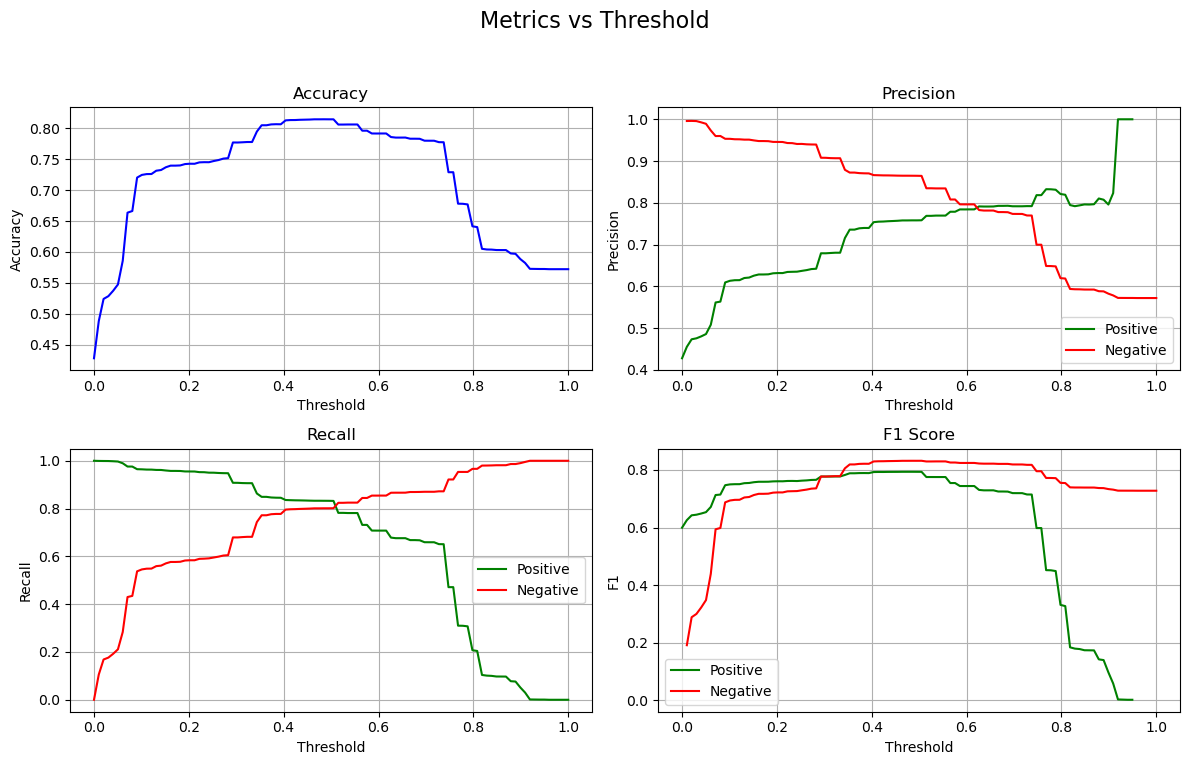

In [238]:
thresholds = np.linspace(0,1,100)
all_metrics = []

for t in thresholds:
    confusion_matrix = compute_confusion_matrix(y_test, lr_proba,t)
    all_metrics.append(compute_scores(confusion_matrix))

metrics_df = pd.DataFrame(all_metrics, index=thresholds)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Metrics vs Threshold', fontsize=16)
# Accuracy
axes[0,0].plot(thresholds, metrics_df['accuracy'], color='blue')
axes[0,0].set_title('Accuracy')
axes[0,0].set_xlabel('Threshold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].grid(True)

# Precision
axes[0,1].plot(thresholds, metrics_df['precision_pos'], label='Positive', color='green')
axes[0,1].plot(thresholds, metrics_df['precision_neg'], label='Negative', color='red')
axes[0,1].set_title('Precision')
axes[0,1].set_xlabel('Threshold')
axes[0,1].set_ylabel('Precision')
axes[0,1].legend()
axes[0,1].grid(True)

axes[1,0].plot(thresholds, metrics_df['recall_pos'], label='Positive', color='green')
axes[1,0].plot(thresholds, metrics_df['recall_neg'], label='Negative', color='red')
axes[1,0].set_title('Recall')
axes[1,0].set_xlabel('Threshold')
axes[1,0].set_ylabel('Recall')
axes[1,0].legend()
axes[1,0].grid(True)

# F1 Score
axes[1,1].plot(thresholds, metrics_df['f1_pos'], label='Positive', color='green')
axes[1,1].plot(thresholds, metrics_df['f1_neg'], label='Negative', color='red')
axes[1,1].set_title('F1 Score')
axes[1,1].set_xlabel('Threshold')
axes[1,1].set_ylabel('F1')
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

                               col      coef
16            intake_type_Wildlife -1.034761
23    sex_upon_outcome_Intact Male -0.824286
22  sex_upon_outcome_Intact Female -0.752290
26        sex_upon_outcome_Unknown -0.506878
21         sex_upon_intake_Unknown -0.506878
19   sex_upon_intake_Neutered Male -0.378617
20   sex_upon_intake_Spayed Female -0.320725
14       intake_type_Public Assist -0.304129
2                  animal_type_Dog -0.123888
5           intake_condition_Feral -0.072550
11           intake_condition_Sick -0.066969
12  intake_type_Euthanasia Request -0.061091
6         intake_condition_Injured -0.046313
4            intake_condition_Aged -0.014896
9           intake_condition_Other -0.013994
10       intake_condition_Pregnant  0.010919
1                  animal_type_Cat  0.012479
7          intake_condition_Normal  0.055626
8         intake_condition_Nursing  0.055849
3                animal_type_Other  0.180139
15               intake_type_Stray  0.184613
0         

<BarContainer object of 27 artists>

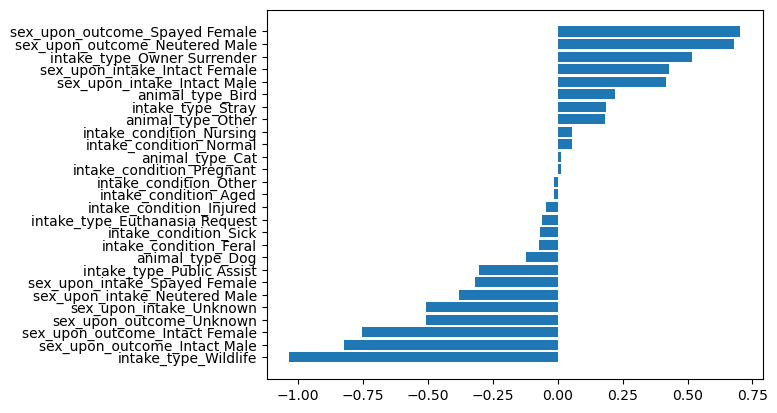

In [272]:
coeffiecients = []
for col, coef in zip(X_train_stand.columns,lr.coef_[0]):
    coeffiecients.append({"col":col, "coef":coef})

table = pd.DataFrame(coeffiecients).sort_values(by='coef')
print(table)

plt.barh(table['col'],table['coef'])



## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

In [273]:
"""a) F1 combine P and R"""

'a) F1 combine P and R'

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [275]:
"""Accurancy = TP+TN/TOTAL =  150/165 = 0.91
    FPR = FP/FP+TN = 10/10+50 = 0.17
    TPR = TP/TP+FN = 100/100+5 = 0.95 
    
    So d)"""

'Accurancy = TP+TN/TOTAL =  150/165 = 0.91\n    FPR = FP/FP+TN = 10/10+50 = 0.17\n    TPR = TP/TP+FN = 100/100+5 = 0.95 \n\n    So d)'